In [ ]:
# pipenv install pandas optuna matplotlib plotly statsmodels nbformat ipykernel scikit-learn ipywidgets sweetviz flask pydantic Flask-Pydantic pyarrow

In [ ]:
#EDA
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.figure_factory as ff
import statsmodels.api as sm  
import sweetviz as sv 

#ML
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score

# Otimizacao de Hiperparametros
import optuna

c:\Users\PC\.virtualenvs\atv_naive_bayes_llm-Ez4OX-U-\Lib\site-packages\sweetviz\graph.py:8: UserWarning:

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.



In [ ]:
# Carregar Data Frame
df_diabetes = pd.read_csv(r'.\datasets\diabetes.csv')

In [ ]:
# Informacao do Data Frame
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   glicemia          995 non-null    int64
 1   pressao_arterial  995 non-null    int64
 2   diabetes          995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [ ]:
# Visualização das 10 primeiras linhas do DF
df_diabetes.head(10)

,glicemia,pressao_arterial,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
5,45,82,0
6,40,85,0
7,30,63,1
8,65,65,1
9,45,82,0


In [ ]:
# Verificação se há valores nulos no DF
df_diabetes.isna().sum()

glicemia            0
pressao_arterial    0
diabetes            0
dtype: int64

DF não possui entradas de valor nulo

In [ ]:
# Verificando o balanceamento dos dados da variavel Target
df_diabetes.value_counts('diabetes')

diabetes
1    498
0    497
Name: count, dtype: int64

Entradas da variável Target estão balanceados

In [ ]:
# Analise de metricas estatisticas
df_diabetes.describe()

,glicemia,pressao_arterial,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


### Treinando Modelo

In [ ]:
# Dividir dados de teste e de treinamento
X = df_diabetes.drop(columns=['diabetes'], axis=1)
y = df_diabetes['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, shuffle=True)

In [ ]:
# Treinando o modelo
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [ ]:
# Realizando a predição
y_pred = model_nb.predict(X_test)

In [ ]:
classification_report_str = classification_report(y_test, y_pred)
recall_model = recall_score(y_test, y_pred, average='macro')
print(f"Relatorio de Classificação:\n{classification_report_str}\nRecall:\n{recall_model}")

Relatorio de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       142
           1       0.95      0.94      0.95       157

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299

Recall:
0.9435049789180945


O modelo de classificação utilizando Naive Bayes obteve uma accuracia de 94%, ou seja, um total de acerto de 94% do conjunto de testes. O modelo obteve um recall de 0.94 o qual indica que o modello mediu bem a quantidade de exemplos verdadeiramente positivos, o qual é uma métrica bastante crucial nesse exemplo, um caso de um falso negativo iria ocasionar num não tratamento da diabetes de um paciente, podendo ser até fatal. 

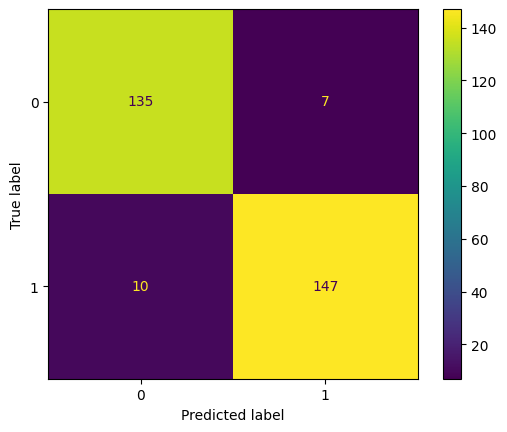

In [ ]:
# Mostrar matriz de confusão
confusion_matrix_modelo_baseline = confusion_matrix(y_test, y_pred)
dis_modelo_baseline = ConfusionMatrixDisplay(confusion_matrix_modelo_baseline)
dis_modelo_baseline.plot()

A matriz de confusão nos mostra visualmente os dados vistos anteriormente 